# Intro to Programming IV: Physical modeling and simulations

In this lecture, we will use for loops and numpy arrays to simulate two population models:

* bacterial growth
* rabbit and fox dynamics (predator-prey)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Part 1: bacterial growth model

Every 20 min, a bacterial cell divides and the cell number doubles. How does the total cell number change over time? We assume 20 min = one generation.

In [2]:
N_generation = 13
timestep = 20 # in minutes

gen = np.arange(1, N_generation+1)
gen

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [3]:
time = np.linspace(0, (N_generation-1)*timestep, N_generation)
time

array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.,
       220., 240.])

In [4]:
# array for storing cell number
cells = np.zeros(N_generation)
cells

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [5]:
# initial cell number
initialcell = 1
cells[0] = initialcell
cells

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

We simulate the successive generations using a for loop.

In [6]:
# simulate bacterial growth with for loop
for i in range(N_generation)[1:]:
    cells[i] = cells[i-1] * 2
cells

array([1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01, 3.200e+01,
       6.400e+01, 1.280e+02, 2.560e+02, 5.120e+02, 1.024e+03, 2.048e+03,
       4.096e+03])

Now plot the number of cells vs. time.

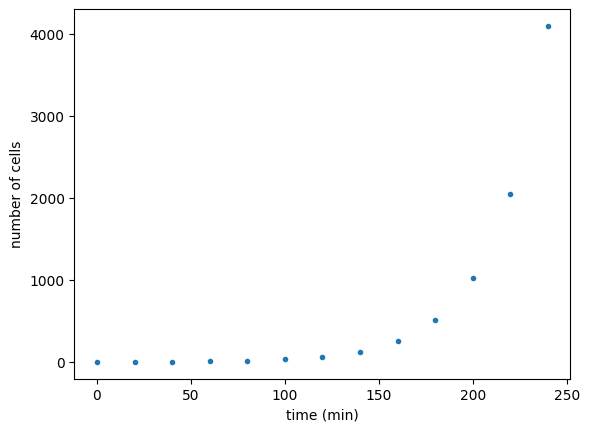

In [7]:
plt.plot(time, cells, '.', label='experiment')
plt.xlabel('time (min)')
plt.ylabel('number of cells')
plt.show()

This looks like exponential growth. Use log scale on the y-axis and plot.

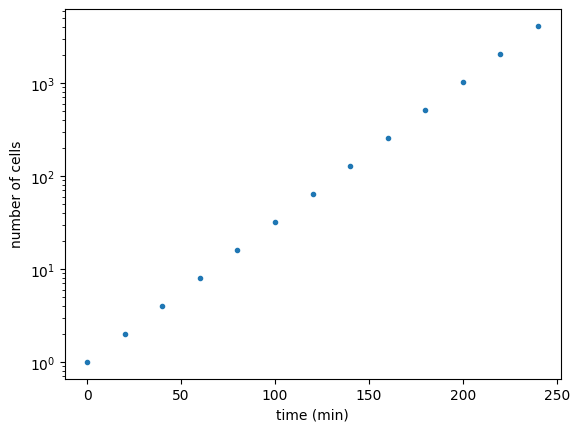

In [8]:
plt.semilogy(time, cells, '.', label='experiment')
plt.xlabel('time (min)')
plt.ylabel('number of cells')
plt.show()

## Bonus 1
In the real world, unlimited growth cannot continue forever. The bacteria might use up the nutrients in the environment, for example. How would you change the model to incorporate such effects?

# Part 2: rabbit and fox model
This is a classic problem in mathematical ecology. Also called predator-prey model or Lotka-Volterra model.

In [9]:
N_generation = 2000
gen = np.arange(1, N_generation+1)

In [10]:
g1 = 0.05 # rabbit growth rate
d1 = 0.001 #  rabbit death rate
g2 = 0.0003 # fox growth rate
d2 = 0.01 # fox death rate

initialrabbit = 100
initialfox = 100

In [11]:
# array for storing rabbit and fox populations
population = np.zeros((N_generation, 2))

# initialize
population[0,0] = initialrabbit # first column
population[0,1] = initialfox # second column

In [12]:
# define the rules that update the population for successive generations

def next_rab_pop(rab, fox, g1, g2, d1, d2):
    return rab + g1*rab - d1*fox*rab

def next_fox_pop(rab, fox, g1, g2, d1, d2):
    return fox + g2*fox*rab - d2*fox

In [13]:
# simulate using a for loop
for i in range(N_generation)[1:]:
    rab = population[i-1,0]
    fox = population[i-1,1]
    population[i,0] = next_rab_pop(rab, fox, g1, g2, d1, d2)
    population[i,1] = next_fox_pop(rab, fox, g1, g2, d1, d2)

Let's look at the population dynamics.

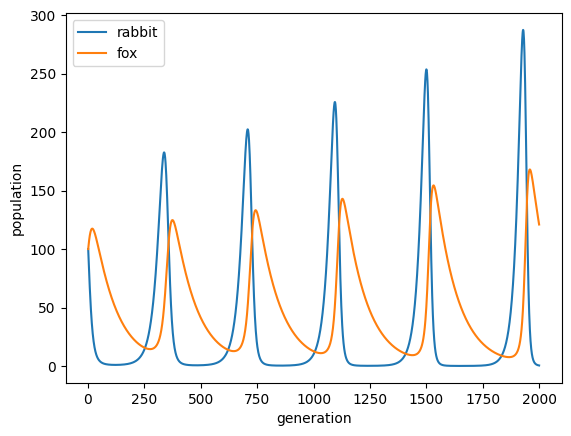

In [14]:
plt.plot(gen, population[:,0], label='rabbit')
plt.plot(gen, population[:,1], label='fox')
plt.xlabel('generation')
plt.ylabel('population')
plt.legend()
plt.show()

Another way to look at the dynamics is using a phase plane. Here the x-axis is the rabbit and y-axis is the fox population.

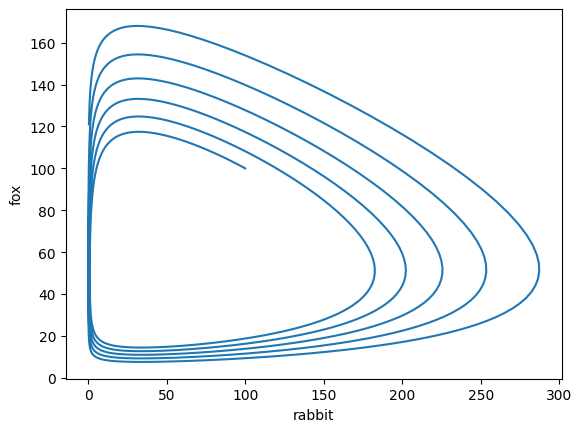

In [15]:
myplot = plt.plot(population[:,0], population[:,1])
plt.xlabel('rabbit')
plt.ylabel('fox')
plt.show()

## Let's wrap this in a function and explore parameters for the growth/death rates.

In [16]:
def sim_rabbitfox(g1, g2, d1, d2, initialrabbit = 100, initialfox = 100, N_generation = 2000):

  population = np.zeros((N_generation, 2))
  population[0,0] = initialrabbit
  population[0,1] = initialfox

  for i in range(N_generation)[1:]:
      rab = population[i-1,0]
      fox = population[i-1,1]
      population[i,0] = next_rab_pop(rab, fox, g1, g2, d1, d2)
      population[i,1] = next_fox_pop(rab, fox, g1, g2, d1, d2)

  fig, axs = plt.subplots(1, 2, figsize=(8,3))
  axs[0].plot(gen, population[:,0], label='rabbit')
  axs[0].plot(gen, population[:,1], label='fox')
  axs[0].set_xlabel('generation')
  axs[0].set_ylabel('population')
  axs[0].legend()

  myplot = axs[1].scatter(population[:,0], population[:,1], s=2, c=gen)
  axs[1].set_xlabel('rabbit')
  axs[1].set_ylabel('fox')

  cbar = plt.colorbar(myplot, ax=axs[1])
  cbar.set_label('Generation')

  fig.suptitle(f'g1={g1},  g2={g2},  d1={d1},  d2={d2}')

  fig.tight_layout()

  return fig, axs

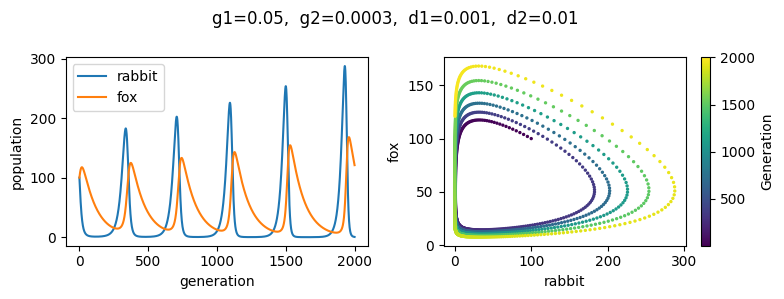

In [17]:
g1, g2, d1, d2 = (0.05, 0.0003, 0.001, 0.01)
fig, axs = sim_rabbitfox(g1, g2, d1, d2)

## Bonus 2
Can you change the growth/death parameters and find interesting dynamics? When does the population go extinct?